In [310]:
%matplotlib inline

import numpy as np
import pylab as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression,Ridge,Lasso

# Central Limit Theorem

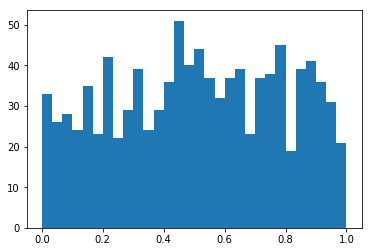

In [312]:
x = np.random.uniform(0,1,1000)
plt.hist(x,30);

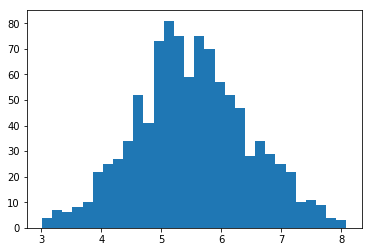

In [313]:
x = np.random.uniform(0,1,1000)
for _ in range(10):
    x += np.random.uniform(0,1,1000)
plt.hist(x,30);

# Maximum likelihood estimation

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/6af346398849ba9dea7df6a7e0f07da49f3c34b5)

In [314]:
def add_noise(x,sigma):
    return x+np.random.normal(0,sigma,x.shape)

In [324]:
age = np.random.uniform(20,50,10000)
fc = age
fc = add_noise(fc,4)

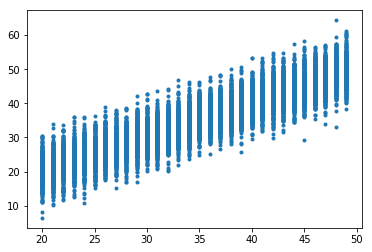

In [333]:
plt.plot(age.astype(int),fc,'.')

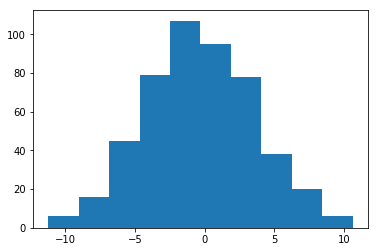

In [327]:
ss = fc-age
plt.hist(ss[10:500]);

In [346]:
age = np.random.uniform(20,50,10000)

In [347]:
stamina = (50-age+20)/50
age = add_noise(age,0.0)

In [348]:
stamina = add_noise(stamina,0.0)

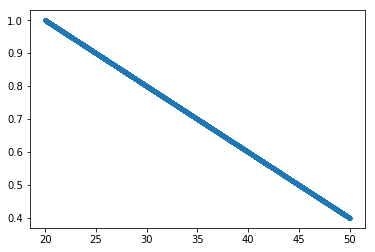

In [349]:
plt.plot(age,stamina,'.')

In [365]:
age = np.random.uniform(20,50,100)
h1 = np.random.normal(300,100,100)

In [366]:
stamina = (50-age+20)/50 + 0.01*h1

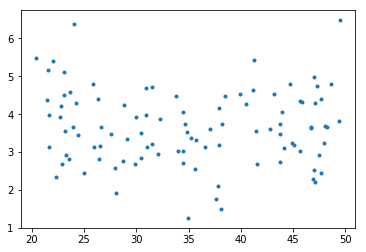

In [367]:
plt.plot(age,stamina,'.')

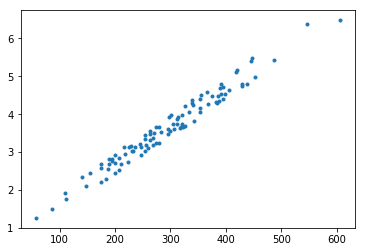

In [368]:
plt.plot(h1,stamina,'.')

In [ ]:

h1 = np.random.normal(300,10,100)
h2 = np.random.normal(1600,50,100)
h3 = np.random.normal(10,0.3,100)

In [129]:
# x = x.reshape(100,1)
# y = y.reshape(100,1)

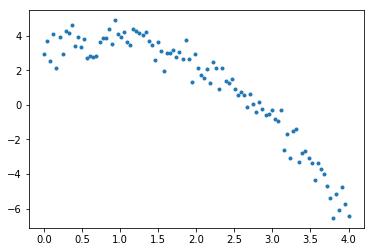

In [130]:
plt.plot(x,y,'.')

In [131]:
coefs, cov = np.polyfit(x, y, deg=2, cov=True)

In [132]:
# plt.imshow(cov)
print(coefs)
print(cov)

[-1.00307822  1.66382853  3.10994739]
[[ 0.00232376 -0.00929503  0.0061341 ]
 [-0.00929503  0.03970812 -0.02959237]
 [ 0.0061341  -0.02959237  0.02974307]]


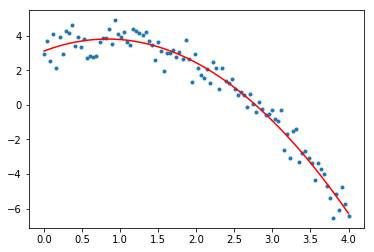

In [133]:
plt.plot(x,y,'.')
plt.plot(x,np.polyval(coefs,x),'r')

In [64]:
credit = pd.read_csv('Credit.csv', usecols=list(range(1,12)))
credit['Student2'] = credit.Student.map({'No':0, 'Yes':1})
credit.head(3)

,Income,Limit,Rating,Cards,Age,Education,Gender,Student,Married,Ethnicity,Balance,Student2
0,14.891,3606,283,2,34,11,Male,No,Yes,Caucasian,333,0
1,106.025,6645,483,3,82,15,Female,Yes,Yes,Asian,903,1
2,104.593,7075,514,4,71,11,Male,No,No,Asian,580,0


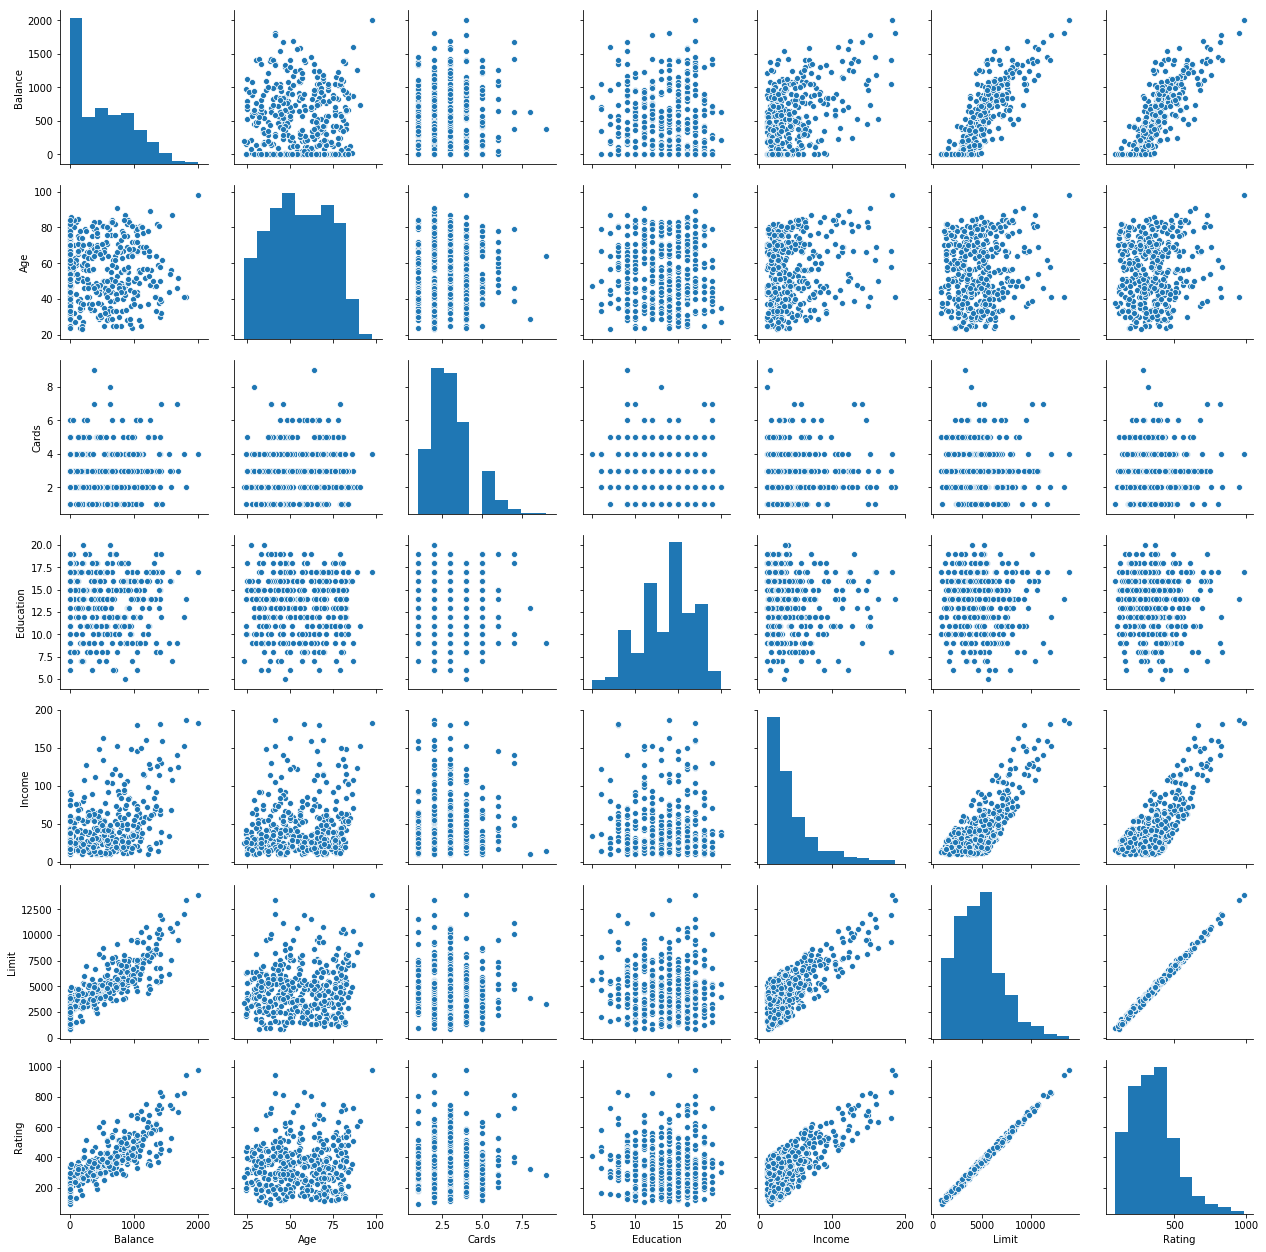

In [136]:
sns.pairplot(credit[['Balance','Age','Cards','Education','Income','Limit','Rating']]);

# The James–Stein estimator 
(for more info. [here](http://statweb.stanford.edu/~ckirby/brad/LSI/chapter1.pdf))

In [411]:
ms = np.random.normal(0.6,0.15,20)
vs = np.zeros(20)+0.1

In [412]:
ms

array([0.49191075, 0.4104986 , 0.58293324, 0.6316814 , 0.66075584,
       0.63304294, 0.8320935 , 0.66353876, 0.35830846, 0.71060878,
       0.85195781, 0.72317917, 0.43491542, 0.57057747, 0.71028109,
       0.78362371, 0.72009272, 0.3888725 , 0.68929453, 0.57204364])

In [413]:
data = np.zeros((20,100))
for day in range(100):
    for i in range(20):
        data[i,day] = np.random.normal(ms[i],vs[i])

In [414]:
truth100 = np.mean(data,axis=1)

In [415]:
np.mean((truth-ms)**2)

0.04901620018044976

In [416]:
pred_mle = np.mean(data[:,:3],axis=1)
np.mean((truth100-pred_mle)**2)

0.002686240659740094

In [417]:
np.mean((ms-pred_mle)**2)

0.002938209762590035

![image](https://wikimedia.org/api/rest_v1/media/math/render/svg/1eef23ffb838e1f2859a021c500788e5687141a9)

$\lVert \mathbf{v} \rVert = \sqrt{x^2 + y^2 + z^2}$

In [418]:
jse = (1- ((20-2)*0.1**2) / np.sum(pred_mle**2) )*pred_mle
jse = jse + (np.mean(pred_mle)-np.mean(jse))

In [419]:
np.mean((truth-jse)**2)

0.05090672311162388

In [420]:
np.mean((ms-jse)**2)

0.002865238577976764

In [410]:
np.mean(pred_mle),np.mean(jse)

(0.5608387448232318, 0.5608387448232318)

In [45]:
lr = LinearRegression()

In [46]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [47]:
lr.coef_

array([[1.86501353]])